## ✅ Bài 1 – Pie chart: Phân bổ loại lỗi thường gặp trong log server

**Tình huống:**  
Bạn đang kiểm tra log hệ thống backend để xác định nguyên nhân gây ra lỗi trong tuần qua.

**Yêu cầu:**  
- Tạo biểu đồ pie thể hiện tỷ lệ của từng loại lỗi: `Timeout`, `ConnectionRefused`, `NotFound`, `InternalError`, `BadRequest`.  
- Custom màu, sắp xếp theo tỷ lệ giảm dần, làm tròn phần trăm hiển thị.  
- Chèn chú thích `percent (%)` cho từng phần.

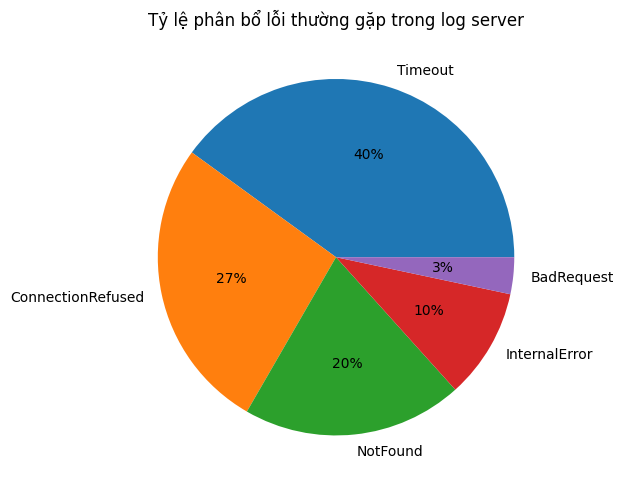

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("bai_tap_1_loi_trong_log_server.csv")
#print(df.head(10))
#print('\n')
#print(df.info())
#print('\n')
#print(df.describe())

# Sắp xếp theo tỷ lệ giảm dần
df = df.sort_values(by='so_lan', ascending=False)

# Dùng colormap có sẵn trong matplotlib để custom màu biểu đồ
colors = plt.cm.Pastel1.colors  # Hoặc: Paired, Set3, tab20, Accent, Dark2

# Gán số liệu vào biểu đồ
values = df['so_lan'].values
categories = df['loai_loi'].values

plt.figure(figsize=(10, 5)) 
plt.pie(values, labels=categories, autopct='%1.0f%%') # Nếu set autopct='%1.1f%% -> lấy 1 số thập phân 50.1%
plt.title("Tỷ lệ phân bổ lỗi thường gặp trong log server")
plt.tight_layout()
plt.show()

## ✅ Bài 2 – Histogram nâng cao: Phân phối thời gian xử lý đơn hàng

**Tình huống:**  
Dữ liệu thời gian xử lý đơn hàng đang có dấu hiệu chậm lại.

**Yêu cầu:**  
- Vẽ histogram phân phối thời gian xử lý (tính theo phút).  
- Điều chỉnh số lượng bins để thể hiện rõ các nhóm thời gian.  
- Highlight vùng bất thường nếu có peak ở vùng xử lý chậm (>30 phút).  
- Annotate số lượng ở vùng chính.

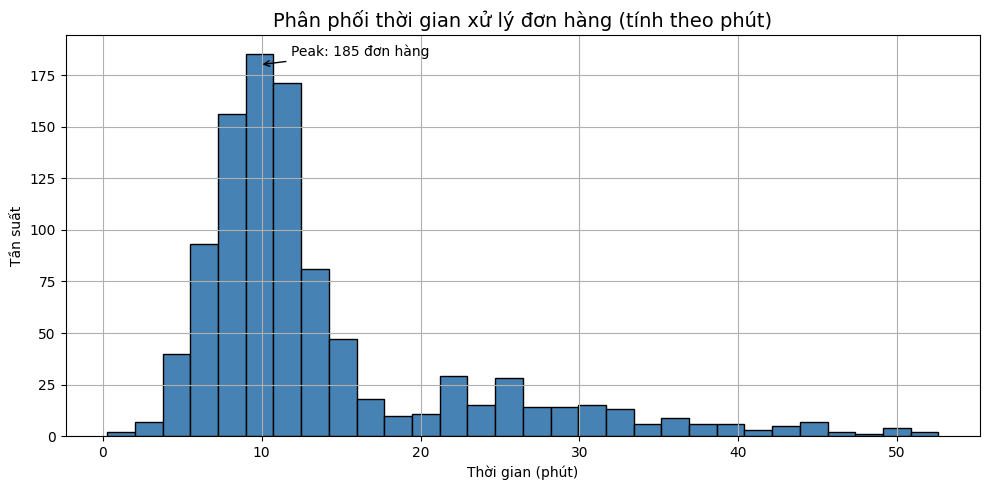

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("bai_tap_2_thoi_gian_xu_ly_don_hang.csv")
nums = df['thoi_gian_xu_ly']

plt.figure(figsize=(10, 5))
counts, bins, patches = plt.hist(nums, bins=30, color='steelblue', edgecolor='black') # Vừa vẽ biểu đồ histogram, vừa lấy ra các thông tin cấu thành biểu đồ để có thể xử lý sâu hơn
plt.title("Phân phối thời gian xử lý đơn hàng (tính theo phút)", fontsize=14)
plt.xlabel("Thời gian (phút)")
plt.ylabel("Tần suất")
plt.grid(True)

# Annotate peak - Gắn nhãn/thông tin lên đỉnh cao nhất của biểu đồ, giúp người đọc dễ dàng nhận diện “trung tâm phân phối” hoặc vùng đáng chú ý.
peak_idx = counts.argmax() # Xác định vị trí đỉnh histogram (bin có tần suất cao nhất)
peak_value = counts[peak_idx] # Lấy giá trị của đỉnh, là số lượng đơn hàng trong bin có tần suất cao nhất
peak_x = (bins[peak_idx] + bins[peak_idx + 1]) / 2 # Tính toạ độ X chính giữa của bin đó để gắn nhãn lên đỉnh (lấy tọa độ X góc trái + X góc phải chia 2 ra X chính giữa)

# Thêm chú thích Peak vào biểu đồ
plt.annotate(f"Peak: {int(peak_value)} đơn hàng", # nội dung chú thích
             xy=(peak_x, peak_value - 5), # toạ độ đầu mũi tên
             xytext=(peak_x + 2, peak_value - 1), # vị trí x, y để đặt nhãn (lệch lên/trái phải)
             arrowprops=dict(facecolor='red', arrowstyle='->'), # kiểu mũi tên
             fontsize=10)

plt.tight_layout()
plt.show()

## ✅ Bài 3 – Bar chart nâng cao: So sánh số task hoàn thành theo quý của các nhóm DE

**Tình huống:**  
Trưởng nhóm DE cần so sánh hiệu suất làm việc của 3 nhóm trong năm.

**Yêu cầu:**  
- Vẽ bar chart theo quý (Q1, Q2, Q3, Q4), mỗi nhóm là 1 cột.  
- Gộp các nhóm theo từng quý.  
- Gắn nhãn số lượng task lên đầu từng cột.  
- Tô màu khác nhau cho từng nhóm.

   quy  nhom  so_task
0   Q1  DE_A       45
1   Q1  DE_B       38
2   Q1  DE_C       40
3   Q2  DE_A       52
4   Q2  DE_B       47
5   Q2  DE_C       44
6   Q3  DE_A       60
7   Q3  DE_B       58
8   Q3  DE_C       50
9   Q4  DE_A       49
10  Q4  DE_B       46
11  Q4  DE_C       43
   quy  nhom  so_task
0   Q1  DE_A       45
1   Q1  DE_B       38
2   Q1  DE_C       40
3   Q2  DE_A       52
4   Q2  DE_B       47
5   Q2  DE_C       44
6   Q3  DE_A       60
7   Q3  DE_B       58
8   Q3  DE_C       50
9   Q4  DE_A       49
10  Q4  DE_B       46
11  Q4  DE_C       43
nhom  DE_A  DE_B  DE_C
quy                   
Q1      45    38    40
Q2      52    47    44
Q3      60    58    50
Q4      49    46    43


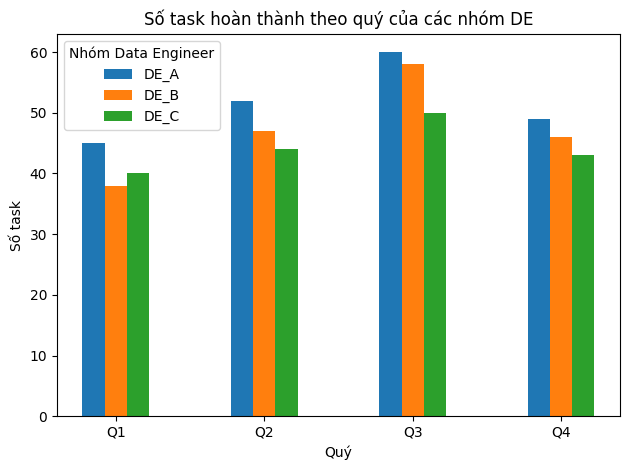

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("bai_tap_3_so_task_cac_nhom_theo_quy.csv")
print(df)

# Group lại data theo cột 'quy' và cột 'nhom'
grouped_df = df.groupby(['quy', 'nhom']).sum().reset_index()
print(grouped_df)

# Pivot bảng với hàng = 'quy', cột = 'nhom' và giá trị = 'so_task'
df_pivot = grouped_df.pivot(index='quy', columns='nhom', values='so_task')
print(df_pivot)

# Vẽ biểu đồ cột nhóm

labels = df_pivot.index.tolist()   # ['Q1', 'Q2', ...]
ds_nhom = df_pivot.columns.tolist()   # ['DE_A', 'DE_B', ...]

x = np.arange(len(labels))         # vị trí trục x
width = 0.15                       # độ rộng mỗi cột

plt.figure()

for i, nhom in enumerate(ds_nhom):
    plt.bar(x + i * width, df_pivot[nhom], width, label=nhom) 

plt.xlabel("Quý")
plt.ylabel("Số task")
plt.title("Số task hoàn thành theo quý của các nhóm DE")
plt.xticks(x + width, labels)
plt.legend(title="Nhóm Data Engineer")
plt.tight_layout()
plt.show()


## ✅ Bài 4 – Horizontal bar chart: Thời gian xử lý trung bình của từng bước trong pipeline

**Tình huống:**  
Bạn muốn tối ưu hóa hiệu năng pipeline ETL gồm nhiều bước.

**Yêu cầu:**  
- Vẽ biểu đồ cột ngang thể hiện thời gian xử lý trung bình (giây) của các bước: `Extract`, `Transform`, `Load`, `Validate`, `Log`.  
- Sắp xếp giảm dần theo thời gian xử lý.  
- Highlight bước mất nhiều thời gian nhất.

        buoc  thoi_gian_tb
1  Transform          25.1
3   Validate          15.2
0    Extract          12.4
2       Load           8.6
4        Log           5.5


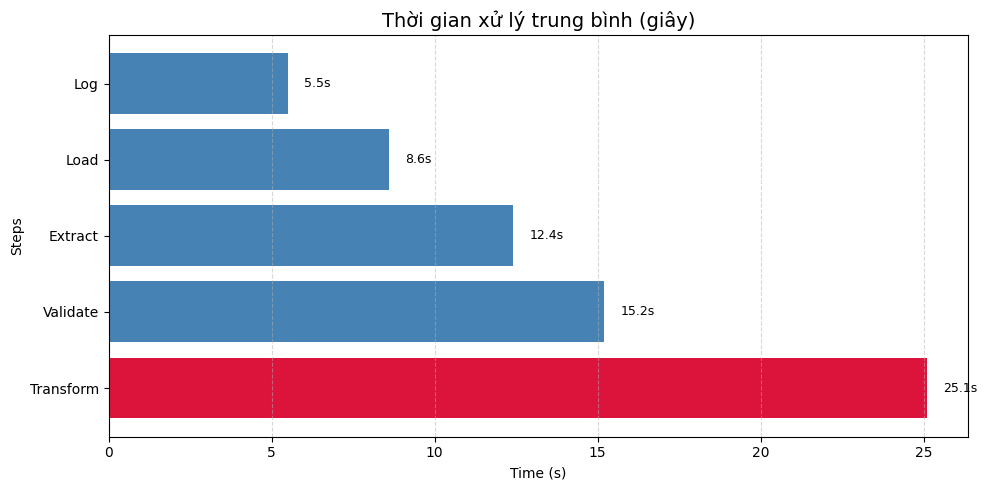

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("bai_tap_4_thoi_gian_xu_ly_pipeline.csv")

# Sắp xếp theo tỷ lệ giảm dần
df = df.sort_values(by='thoi_gian_tb', ascending=False)

print(df)

# Gán giá trị cho trục x, trục y
x = df['thoi_gian_tb']
y = df['buoc']

# Tô màu: màu đỏ cho bước lớn nhất, còn lại màu xanh
colors = ['crimson' if val == x.max() else 'steelblue' for val in x]

# Tạo biểu đồ cột ngang + lấy giá trị bars (tự động)
plt.figure(figsize=(10, 5))
bars = plt.barh(y, x, color=colors)

# Gắn nhãn thời gian lên các bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2,
             f'{width:.1f}s', va='center', fontsize=9)

plt.title("Thời gian xử lý trung bình (giây)", fontsize=14)
plt.xlabel("Time (s)")
plt.ylabel("Steps")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## ✅ Bài 5 – Grouped bar chart: So sánh chi phí cloud theo dịch vụ và quý

**Tình huống:**  
Bộ phận tài chính yêu cầu theo dõi chi phí cloud (GCP, AWS, Azure) theo quý.

**Yêu cầu:**  
- Vẽ grouped bar chart với các quý Q1–Q4 trên trục x.  
- Mỗi dịch vụ là một cột trong nhóm.  
- Gắn nhãn chi phí lên từng cột.  
- Làm nổi bật quý tốn kém nhất.

   quy dich_vu  chi_phi
0   Q1     GCP      120
1   Q1     AWS      135
2   Q1   Azure      110
3   Q2     GCP      140
4   Q2     AWS      145
5   Q2   Azure      130
6   Q3     GCP      150
7   Q3     AWS      160
8   Q3   Azure      138
9   Q4     GCP      155
10  Q4     AWS      148
11  Q4   Azure      142
dich_vu  AWS  Azure  GCP
quy                     
Q1       135    110  120
Q2       145    130  140
Q3       160    138  150
Q4       148    142  155


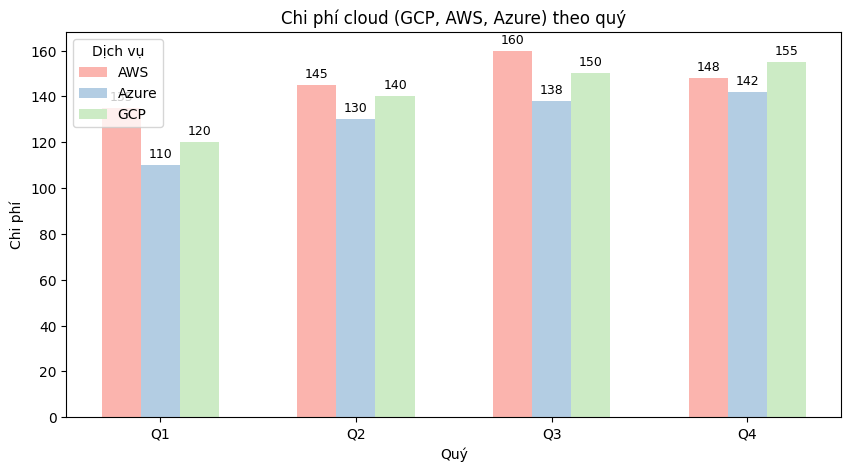

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df_cloud = pd.read_csv("bai_tap_5_chi_phi_cloud_theo_quy.csv")
print(df_cloud)

# Pivot bảng với hàng = 'quy', cột = 'dich_vu' và giá trị = 'chi_phi'
df_cloud_pivot = df_cloud.pivot(index='quy', columns='dich_vu', values='chi_phi')
print(df_cloud_pivot)

# Vẽ biểu đồ cột nhóm
labels = df_cloud_pivot.index.tolist()        # ['Q1', 'Q2', 'Q3', 'Q4']
ds_dich_vu = df_cloud_pivot.columns.tolist()  # ['AWS', 'Azure', 'GCP']
x = np.arange(len(labels))                    # vị trí cột gốc
width = 0.2                                   # độ rộng mỗi cột

# Chọn màu riêng cho từng dịch vụ
colors = plt.cm.Pastel1.colors[:len(ds_dich_vu)]

plt.figure(figsize=(10, 5))

# Vẽ từng nhóm dịch vụ
for i, dich_vu in enumerate(ds_dich_vu):
    bar_pos = x + i * width
    values = df_cloud_pivot[dich_vu]
    bars = plt.bar(bar_pos, values, width, label=dich_vu, color=colors[i])

    # Gắn nhãn số chi phí lên đầu cột
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 2,
                 f"{int(height)}", ha='center', va='bottom', fontsize=9)

plt.xlabel("Quý")
plt.ylabel("Chi phí")
plt.title("Chi phí cloud (GCP, AWS, Azure) theo quý")
plt.xticks(x + width, labels)
plt.legend(title="Dịch vụ")
#plt.tight_layout()
plt.show()


## ✅ Bài 6 – Line chart nhiều series: So sánh độ trễ trung bình của 3 pipeline ETL theo ngày

**Tình huống:**  
Cần theo dõi độ trễ (latency) trung bình theo ngày của 3 pipeline: `daily_sales`, `user_events`, `inventory_sync`.

**Yêu cầu:**  
- Vẽ biểu đồ đường, mỗi pipeline một đường khác nhau.  
- Highlight điểm có độ trễ cao nhất cho từng pipeline.  
- Thêm chú thích ngày/giá trị tại peak.

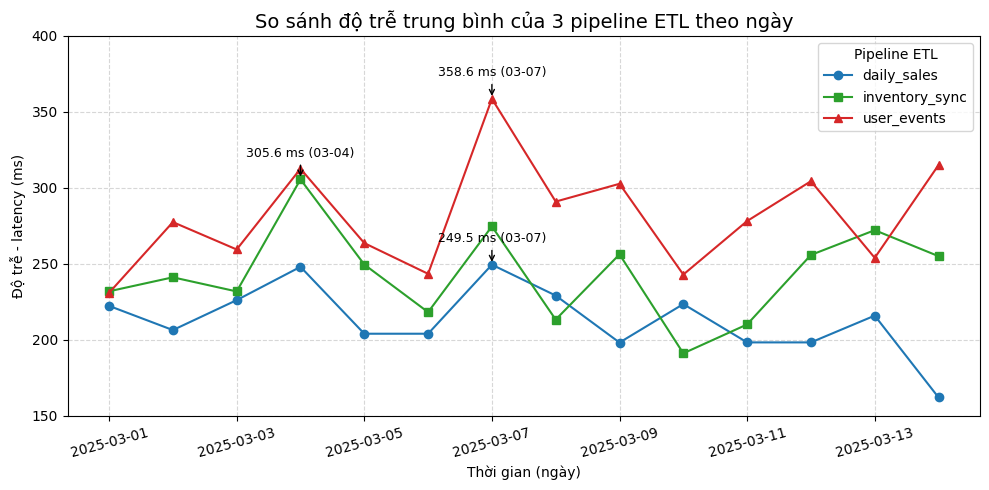

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu
df = pd.read_csv("bai_tap_6_do_tre_cac_pipeline_theo_ngay.csv")
df['ngay'] = pd.to_datetime(df['ngay'])

# Pivot: hàng = ngày, cột = pipeline, giá trị = latency
df_pivot = df.pivot(index='ngay', columns='pipeline', values='latency_ms')

# Thiết lập biểu đồ
plt.figure(figsize=(10, 5))

# Mỗi pipeline có màu + marker riêng
pipelines = df_pivot.columns
markers = ['o', 's', '^']
colors = ['#1f77b4', '#2ca02c', '#d62728']

for i, p in enumerate(pipelines):
    # Vẽ đường
    plt.plot(df_pivot.index, df_pivot[p], label=p, marker=markers[i], color=colors[i])

    # Highlight điểm cao nhất
    peak_idx = df_pivot[p].idxmax()             # ngày peak
    peak_val = df_pivot[p].max()                # độ trễ peak

    # Gắn nhãn và mũi tên chú thích ngày/giá trị tại peak
    plt.annotate(f"{peak_val:.1f} ms ({peak_idx.strftime('%m-%d')})",
                 xy=(peak_idx, peak_val),
                 xytext=(peak_idx, peak_val + 15),
                 textcoords='data',
                 ha='center',
                 fontsize=9,
                 arrowprops=dict(facecolor=colors[i], arrowstyle='->'))

# Tuỳ chỉnh biểu đồ
plt.title("So sánh độ trễ trung bình của 3 pipeline ETL theo ngày", fontsize=14)
plt.xlabel("Thời gian (ngày)")
plt.ylabel("Độ trễ - latency (ms)")
plt.ylim(150, 400) # Thiết lập giới hạn trên và dưới của cột Y (thay vì để mặc định theo dataset)
plt.legend(title="Pipeline ETL")
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=15)
plt.tight_layout()

plt.show()


## ✅ Bài 7 – Stacked area chart: Tổng băng thông sử dụng của các service trong tuần

**Tình huống:**  
Bạn cần xem khối lượng data sử dụng của các service: `api_gateway`, `auth_service`, `data_stream`, `cache_proxy` trong 7 ngày.

**Yêu cầu:**  
- Vẽ stacked area chart theo ngày.  
- Mỗi service là một vùng màu.  
- Thể hiện rõ khối lượng tích lũy.  
- Annotate tổng băng thông vào ngày cao nhất.

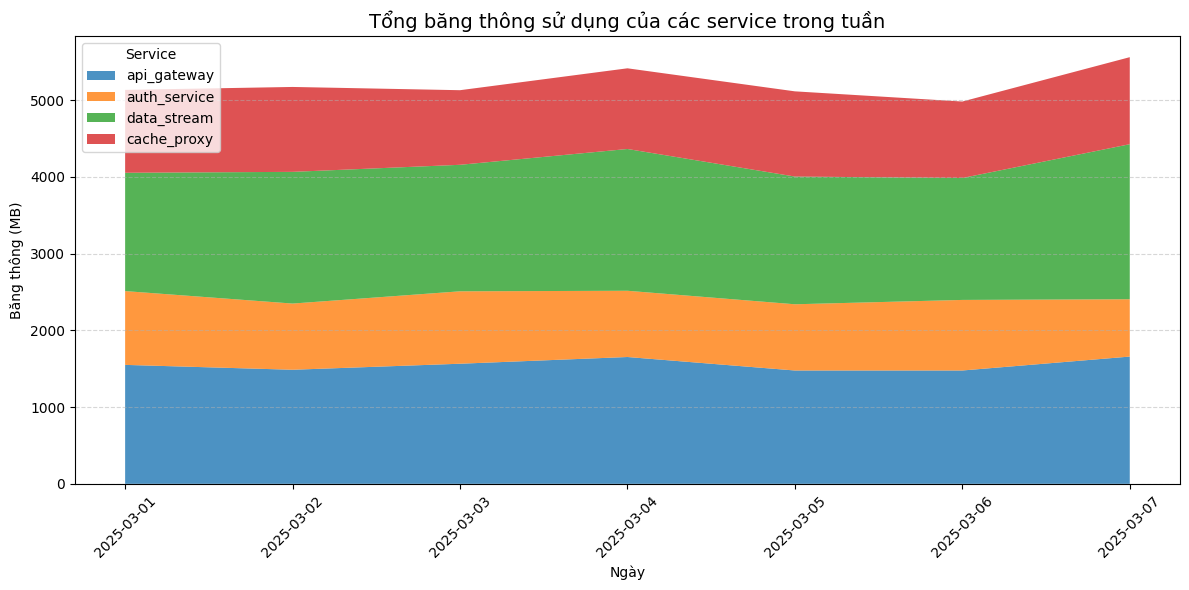

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu
df = pd.read_csv("bai_tap_7_bang_thong_cac_service.csv")
df['ngay'] = pd.to_datetime(df['ngay'])

# Vẽ stacked area chart
plt.figure(figsize=(12, 6))
plt.stackplot(
    df['ngay'],
    df['api_gateway'],
    df['auth_service'],
    df['data_stream'],
    df['cache_proxy'],
    labels=['api_gateway', 'auth_service', 'data_stream', 'cache_proxy'],
    alpha=0.8
)

# Tuỳ chỉnh biểu đồ
plt.title("Tổng băng thông sử dụng của các service trong tuần", fontsize=14)
plt.xlabel("Ngày")
plt.ylabel("Băng thông (MB)")
plt.legend(loc='upper left', title="Service")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## ✅ Bài 8 – Box plot theo nhóm: So sánh độ trễ API giữa các service

**Tình huống:**  
Nhóm DevOps muốn đánh giá độ ổn định (latency) của các API: `login`, `search`, `checkout`, `profile`.

**Yêu cầu:**  
- Vẽ boxplot theo từng API.  
- Nhận diện median, outliers.  
- Thêm đường trung bình latency toàn hệ thống để so sánh.

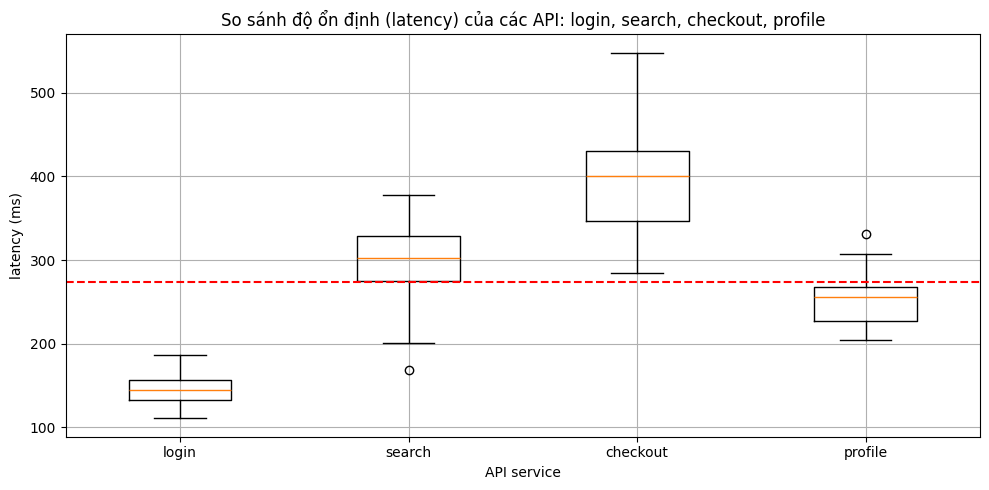

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu
df = pd.read_csv("bai_tap_8_do_tre_api_theo_service.csv")\

df.head(30)

# Nhóm latency_ms theo service thành một DANH SÁCH 'latency_ms_groups'
latency_ms_groups = []
for each_service in df['service'].unique():
    mask = df[df['service'] == each_service]  # boolean indexing / boolean masking
    values = mask['latency_ms'].values  # lấy danh sách giá trị values theo cột 'latency_ms' từ mask của each_service
    latency_ms_groups.append(values)  # thêm values vào danh sách tổng

# Tính latency_ms trung bình trên toàn hệ thống
mean_latency = df['latency_ms'].mean()

plt.figure(figsize=(10, 5))
plt.boxplot(latency_ms_groups, tick_labels=df['service'].unique())
plt.axhline(mean_latency, color='red', linestyle='--', label=f'Mean toàn hệ thống: {mean_latency:.1f} ms') # Vẽ thêm đường trung bình - mean - toàn hệ thống
plt.title("So sánh độ ổn định (latency) của các API: login, search, checkout, profile")
plt.xlabel("API service")
plt.ylabel("latency (ms)")
plt.grid(True)
plt.tight_layout()
plt.show()

## ✅ Bài 9 – Dual-axis plot: Số lượng request và độ trễ trung bình của server

**Tình huống:**  
Monitoring hệ thống server trong giờ cao điểm cần kiểm tra mối liên hệ giữa request và latency.

**Yêu cầu:**  
- Trục x: các khung giờ.  
- Trục y trái: số lượng request.  
- Trục y phải: độ trễ trung bình (ms).  
- Kết hợp cột + đường, sử dụng hai trục y.

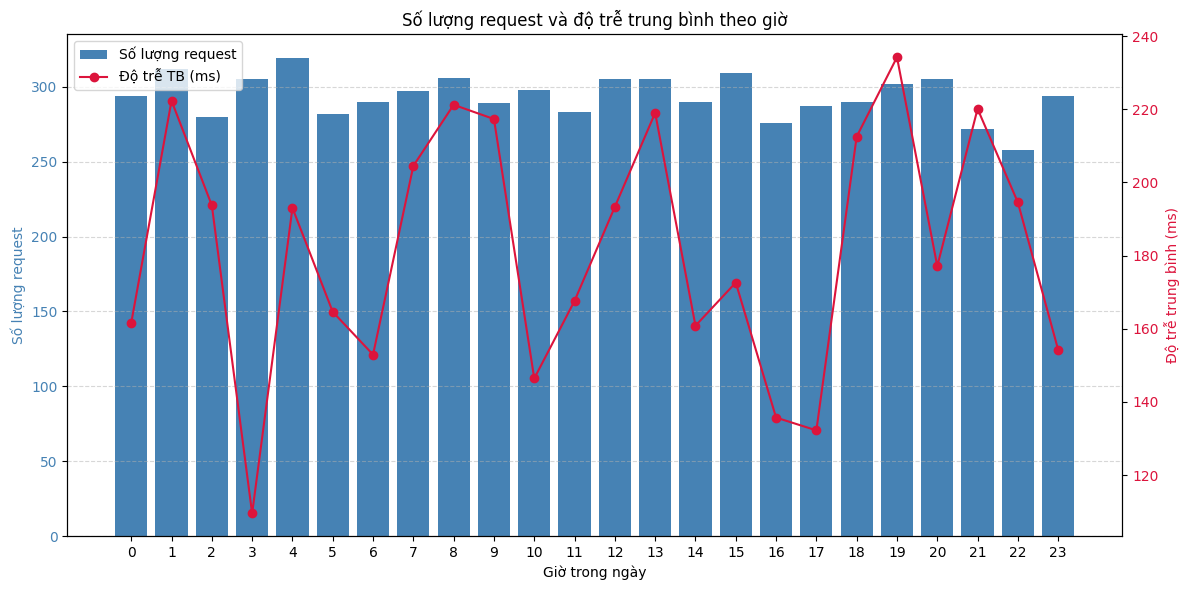

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu
df = pd.read_csv("bai_tap_9_request_va_do_tre_theo_gio.csv")
df.head(30)

# Bước 1: Đọc dữ liệu & chuẩn bị
fig, ax1 = plt.subplots(figsize=(12, 6))

# Trục Y bên trái – số lượng request (bar chart)
ax1.bar(df['gio'], df['so_luong_request'], color='steelblue', label='Số lượng request')
ax1.set_xlabel("Giờ trong ngày")
ax1.set_ylabel("Số lượng request", color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')

# Trục Y bên phải – độ trễ trung bình (line chart)
ax2 = ax1.twinx()
ax2.plot(df['gio'], df['do_tre_tb_ms'], color='crimson', marker='o', label='Độ trễ TB (ms)')
ax2.set_ylabel("Độ trễ trung bình (ms)", color='crimson')
ax2.tick_params(axis='y', labelcolor='crimson')

# Tùy chỉnh & hiển thị biểu đồ
plt.title("Số lượng request và độ trễ trung bình theo giờ")
ax1.grid(axis='y', linestyle='--', alpha=0.5)

# Kết hợp legend của cả hai trục
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.xticks(df['gio'])  # hiển thị đầy đủ 24 giờ
plt.tight_layout()
plt.show()


## ✅ Bài 10 – Heatmap bằng matplotlib: Số lượng request mỗi giờ trong tuần

**Tình huống:**  
Bạn muốn phân tích thời gian cao điểm truy cập trong tuần.

**Yêu cầu:**  
- Trục x: các giờ trong ngày (0–23), trục y: thứ trong tuần (Mon–Sun).  
- Mỗi ô là số lượng request.  
- Vẽ heatmap hoàn toàn bằng matplotlib (không seaborn).  
- Dùng màu sắc phản ánh cường độ, thêm chú thích số lượng tại các ô cao nhất.

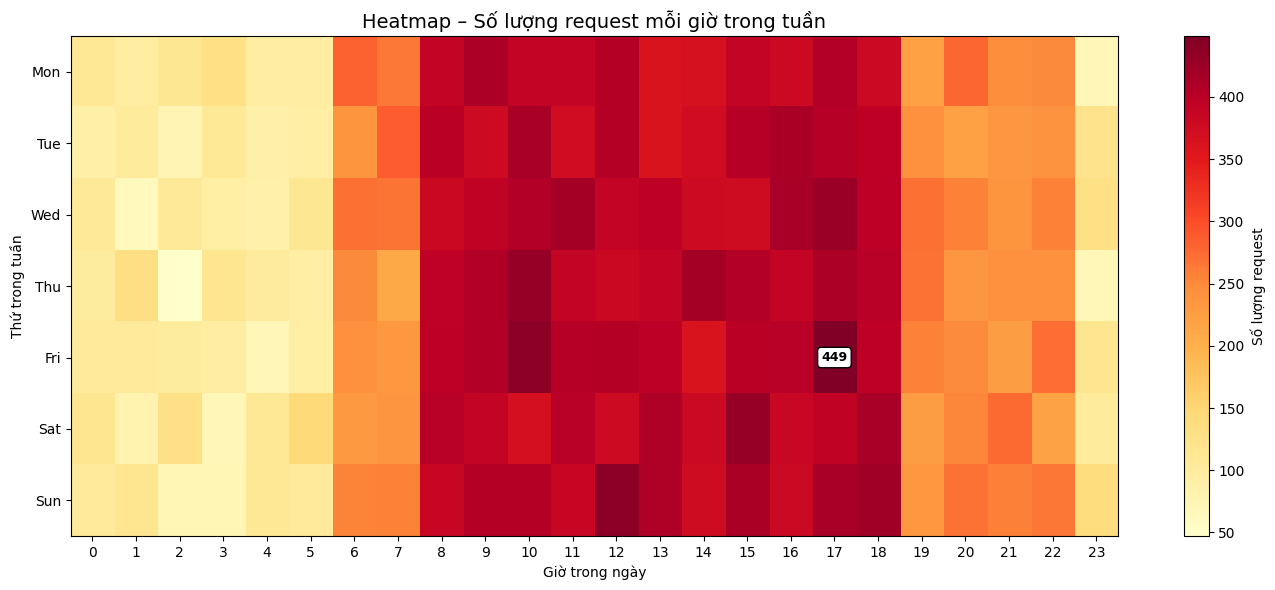

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# =====================================================
# BƯỚC 1: Đọc và chuẩn hóa dữ liệu
# =====================================================
df = pd.read_csv("bai_tap_10_request_theo_gio_trong_tuan.csv")

# Xác định thứ tự ngày trong tuần (đảm bảo không bị sắp xếp alphabet)
thu_order = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
df['thu'] = pd.Categorical(df['thu'], categories=thu_order, ordered=True)

# Pivot thành ma trận 7x24: hàng = thứ, cột = giờ
heatmap_data = df.pivot(index='thu', columns='gio', values='so_luong_request')
# Chuyển thành numpy array (đúng định dạng cho imshow)
data_matrix = heatmap_data.values

# =====================================================
# BƯỚC 2: Vẽ heatmap bằng matplotlib
# =====================================================
fig, ax = plt.subplots(figsize=(14, 6))

# Vẽ heatmap chính
cmap = plt.cm.YlOrRd  # colormap: vàng → cam → đỏ
heatmap = ax.imshow(data_matrix, aspect='auto', cmap=cmap)

# =====================================================
# BƯỚC 3: Gắn nhãn trục X, Y và chú thích
# =====================================================
# Trục X: giờ (0–23)
ax.set_xticks(np.arange(24))
ax.set_xticklabels([str(h) for h in range(24)])
ax.set_xlabel("Giờ trong ngày")

# Trục Y: các thứ
ax.set_yticks(np.arange(len(thu_order)))
ax.set_yticklabels(thu_order)
ax.set_ylabel("Thứ trong tuần")

# Tiêu đề
plt.title("Heatmap – Số lượng request mỗi giờ trong tuần", fontsize=14)

# Gắn colorbar (thanh chú thích mức độ request)
cbar = plt.colorbar(heatmap, ax=ax)
cbar.set_label("Số lượng request")

# =====================================================
# BƯỚC 4: Annotate giá trị tại ô cao nhất
# =====================================================
max_value = np.max(data_matrix)
max_idx = np.unravel_index(np.argmax(data_matrix), data_matrix.shape)
max_day, max_hour = max_idx
ax.text(max_hour, max_day, f"{max_value}", ha='center', va='center', color='black',
        fontsize=9, fontweight='bold', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Bổ sung grid nhẹ
ax.grid(False)
plt.tight_layout()
plt.show()
